In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter

In [8]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [9]:
address = '/Users/ranja/Downloads/archive/Statement_SES_2011-12-Enrlment.csv'
enroll = pd.read_csv(address)
enroll.columns = ['Year', 'All Categories - Class I-V - Boys',
       'All Categories - Class I-V - Girls',
       'All Categories - Class I-V - Total',
       'All Categories - Class VI-VIII - Boys',
       'All Categories - Class VI-VIII - Girls',
       'All Categories - Class VI-VIII - Total',
       'All Categories - Class IX-X - Boys',
       'All Categories - Class IX-X - Girls',
       'All Categories - Class IX-X - Total',
       'All Categories - Class XI-XII - Boys',
       'All Categories - Class XI-XII - Girls',
       'All Categories - Class XI-XII - Total',
       'Scheduled Caste Category - Class I-V - Boys',
       'Scheduled Caste Category - Class I-V - Girls',
       'Scheduled Caste Category - Class I-V - Total',
       'Scheduled Caste Category - Class VI-VIII - Boys',
       'Scheduled Caste Category - Class VI-VIII - Girls',
       'Scheduled Caste Category - Class VI-VIII - Total',
       'Scheduled Caste Category - Class IX-X - Boys',
       'Scheduled Caste Category - Class IX-X - Girls',
       'Scheduled Caste Category - Class IX-X - Total',
       'Scheduled Caste Category - Class XI-XII - Boys',
       'Scheduled Caste Category - Class XI-XII - Girls',
       'Scheduled Caste Category - Class XI-XII - Total',
       'Scheduled Tribe Category - Class I-V - Boys',
       'Scheduled Tribe Category - Class I-V - Girls',
       'Scheduled Tribe Category - Class I-V - Total',
       'Scheduled Tribe Category - Class VI-VIII - Boys',
       'Scheduled Tribe Category - Class VI-VIII - Girls',
       'Scheduled Tribe Category - Class VI-VIII - Total',
       'Scheduled Tribe Category - Class IX-X - Boys',
       'Scheduled Tribe Category - Class IX-X - Girls',
       'Scheduled Tribe Category - Class IX-X - Total',
       'Scheduled Tribe Category - Class XI-XII - Boys',
       'Scheduled Tribe Category - Class XI-XII - Girls',
       'Scheduled Tribe Category - Class XI-XII - Total']
enroll.head()

,Year,All Categories - Class I-V - Boys,All Categories - Class I-V - Girls,All Categories - Class I-V - Total,All Categories - Class VI-VIII - Boys,All Categories - Class VI-VIII - Girls,All Categories - Class VI-VIII - Total,All Categories - Class IX-X - Boys,All Categories - Class IX-X - Girls,All Categories - Class IX-X - Total,...,Scheduled Tribe Category - Class I-V - Total,Scheduled Tribe Category - Class VI-VIII - Boys,Scheduled Tribe Category - Class VI-VIII - Girls,Scheduled Tribe Category - Class VI-VIII - Total,Scheduled Tribe Category - Class IX-X - Boys,Scheduled Tribe Category - Class IX-X - Girls,Scheduled Tribe Category - Class IX-X - Total,Scheduled Tribe Category - Class XI-XII - Boys,Scheduled Tribe Category - Class XI-XII - Girls,Scheduled Tribe Category - Class XI-XII - Total
0,1950-51,13.8,5.4,19.2,2.6,0.5,3.1,NaN,NaN,0.0,...,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
1,1955-56,17.1,7.5,24.6,3.8,1.0,4.8,NaN,NaN,0.0,...,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
2,1960-61,23.6,11.4,35.0,5.1,1.6,6.7,NaN,NaN,0.0,...,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
3,1965-66,32.2,18.3,50.5,7.7,2.8,10.5,NaN,NaN,0.0,...,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
4,1970-71,35.7,21.3,57.0,9.4,3.9,13.3,NaN,NaN,0.0,...,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0


In [9]:
sb.pairplot(enroll)

C:\Users\ranja\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [10]:
enroll['Year'] = pd.to_numeric(enroll['Year'], errors='coerce')


In [11]:
print(enroll.dtypes)


Year                                                float64
All Categories - Class I-V - Boys                   float64
All Categories - Class I-V - Girls                  float64
All Categories - Class I-V - Total                  float64
All Categories - Class VI-VIII - Boys               float64
All Categories - Class VI-VIII - Girls              float64
All Categories - Class VI-VIII - Total              float64
All Categories - Class IX-X - Boys                  float64
All Categories - Class IX-X - Girls                 float64
All Categories - Class IX-X - Total                 float64
All Categories - Class XI-XII - Boys                float64
All Categories - Class XI-XII - Girls               float64
All Categories - Class XI-XII - Total               float64
Scheduled Caste Category - Class I-V - Boys         float64
Scheduled Caste Category - Class I-V - Girls        float64
Scheduled Caste Category - Class I-V - Total        float64
Scheduled Caste Category - Class VI-VIII

In [12]:
print(enroll.corr())

                                                  Year  \
Year                                               NaN   
All Categories - Class I-V - Boys                  NaN   
All Categories - Class I-V - Girls                 NaN   
All Categories - Class I-V - Total                 NaN   
All Categories - Class VI-VIII - Boys              NaN   
All Categories - Class VI-VIII - Girls             NaN   
All Categories - Class VI-VIII - Total             NaN   
All Categories - Class IX-X - Boys                 NaN   
All Categories - Class IX-X - Girls                NaN   
All Categories - Class IX-X - Total                NaN   
All Categories - Class XI-XII - Boys               NaN   
All Categories - Class XI-XII - Girls              NaN   
All Categories - Class XI-XII - Total              NaN   
Scheduled Caste Category - Class I-V - Boys        NaN   
Scheduled Caste Category - Class I-V - Girls       NaN   
Scheduled Caste Category - Class I-V - Total       NaN   
Scheduled Cast

In [39]:
enroll_data = enroll.iloc[:, 2:7].values
enroll_target = enroll.iloc[:, 1].values
enroll_data_names = ['All Categories - Class I-V - Boys',
       'All Categories - Class I-V - Girls',
       'All Categories - Class I-V - Total',
       'All Categories - Class VI-VIII - Boys',
       'All Categories - Class VI-VIII - Girls',
       'All Categories - Class VI-VIII - Total',
       'All Categories - Class IX-X - Boys',
       'All Categories - Class IX-X - Girls',
       'All Categories - Class IX-X - Total',
       'All Categories - Class XI-XII - Boys',
       'All Categories - Class XI-XII - Girls',
       'All Categories - Class XI-XII - Total',
       'Scheduled Caste Category - Class I-V - Boys',
       'Scheduled Caste Category - Class I-V - Girls',
       'Scheduled Caste Category - Class I-V - Total',
       'Scheduled Caste Category - Class VI-VIII - Boys',
       'Scheduled Caste Category - Class VI-VIII - Girls',
       'Scheduled Caste Category - Class VI-VIII - Total',
       'Scheduled Caste Category - Class IX-X - Boys',
       'Scheduled Caste Category - Class IX-X - Girls',
       'Scheduled Caste Category - Class IX-X - Total',
       'Scheduled Caste Category - Class XI-XII - Boys',
       'Scheduled Caste Category - Class XI-XII - Girls',
       'Scheduled Caste Category - Class XI-XII - Total',
       'Scheduled Tribe Category - Class I-V - Boys',
       'Scheduled Tribe Category - Class I-V - Girls',
       'Scheduled Tribe Category - Class I-V - Total',
       'Scheduled Tribe Category - Class VI-VIII - Boys',
       'Scheduled Tribe Category - Class VI-VIII - Girls',
       'Scheduled Tribe Category - Class VI-VIII - Total',
       'Scheduled Tribe Category - Class IX-X - Boys',
       'Scheduled Tribe Category - Class IX-X - Girls',
       'Scheduled Tribe Category - Class IX-X - Total',
       'Scheduled Tribe Category - Class XI-XII - Boys',
       'Scheduled Tribe Category - Class XI-XII - Girls',
       'Scheduled Tribe Category - Class XI-XII - Total']

X, y = scale(enroll_data), enroll_target

In [40]:
enroll_target,scale(enroll_data)

(array([13.8, 17.1, 23.6, 32.2, 35.7, 40.6, 45.3, 52.2, 57. , 58.6, 57.9,
        55.1, 60. , 60.9, 61.4, 62.3, 62.7, 63.6, 64. , 63.6, 65.1, 68.4,
        69.7, 70.5, 71.1, 71.1, 70.6, 69.7, 70.1, 72.6]),
 array([[-2.18979918, -2.39755684, -2.1700918 , -1.74185201, -1.96878053],
        [-2.07182641, -2.23851167, -2.03310546, -1.68397036, -1.8705053 ],
        [-1.85273414, -1.93220245, -1.88470361, -1.61451237, -1.76066827],
        [-1.46510935, -1.47568391, -1.58789989, -1.47559639, -1.54099422],
        [-1.29657683, -1.28424065, -1.39383592, -1.34825674, -1.37912913],
        [-1.08872006, -1.0309465 , -1.21118748, -1.2209171 , -1.22304493],
        [-0.89209879, -0.78943346, -0.88013718, -1.01254313, -0.95134281],
        [-0.5157095 , -0.38887526, -0.44634713, -0.68840585, -0.56980366],
        [-0.22358647, -0.09434717, -0.01255708, -0.35269223, -0.18248362],
        [-0.11684921,  0.00873767,  0.04452056, -0.22535259, -0.08998928],
        [-0.15055572, -0.02955099, -0.046803

In [41]:
###Checking for missing values

In [42]:
missing_values = X==np.NAN
X[missing_values == True]

array([], dtype=float64)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the model
LinReg = LinearRegression()
LinReg.fit(X_scaled, y)

# Score the model
linregpred = LinReg.score(X_scaled, y)
print(linregpred)

#print(LinReg.score(X,y))

0.9999990715965233


<function matplotlib.pyplot.show(close=None, block=None)>

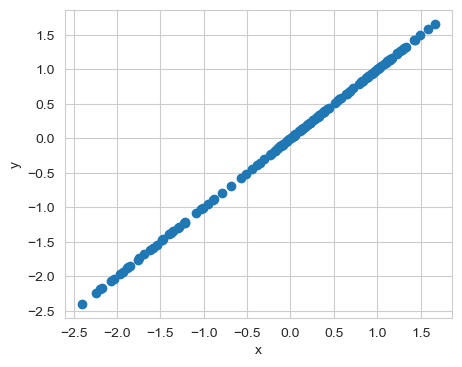

In [44]:
plt.scatter(X,X)
plt.ylabel("y")
plt.xlabel("x")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

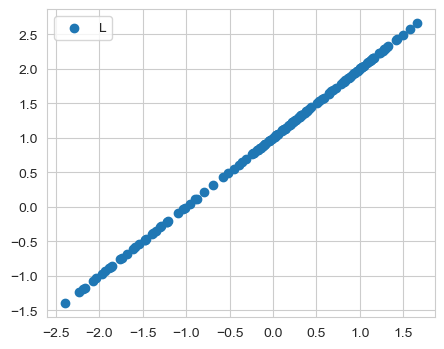

In [45]:
plt.scatter(X,X+linregpred)
plt.legend("Linear PLot")
plt.LogLocator(linregpred)
plt.show
